In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling


Running model: yolov8n.pt

image 1/1 /content/test_image.png: 640x480 1 person, 295.5ms
Speed: 9.8ms preprocess, 295.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 480)

Running model: yolov8s.pt

image 1/1 /content/test_image.png: 640x480 1 person, 484.5ms
Speed: 3.4ms preprocess, 484.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

Running model: yolov8m.pt

image 1/1 /content/test_image.png: 640x480 1 person, 1103.3ms
Speed: 3.4ms preprocess, 1103.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

Running model: yolov8l.pt

image 1/1 /content/test_image.png: 640x480 1 person, 2275.3ms
Speed: 3.4ms preprocess, 2275.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

Running model: yolov8x.pt

image 1/1 /content/test_image.png: 640x480 1 person, 4375.9ms
Speed: 3.5ms preprocess, 4375.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


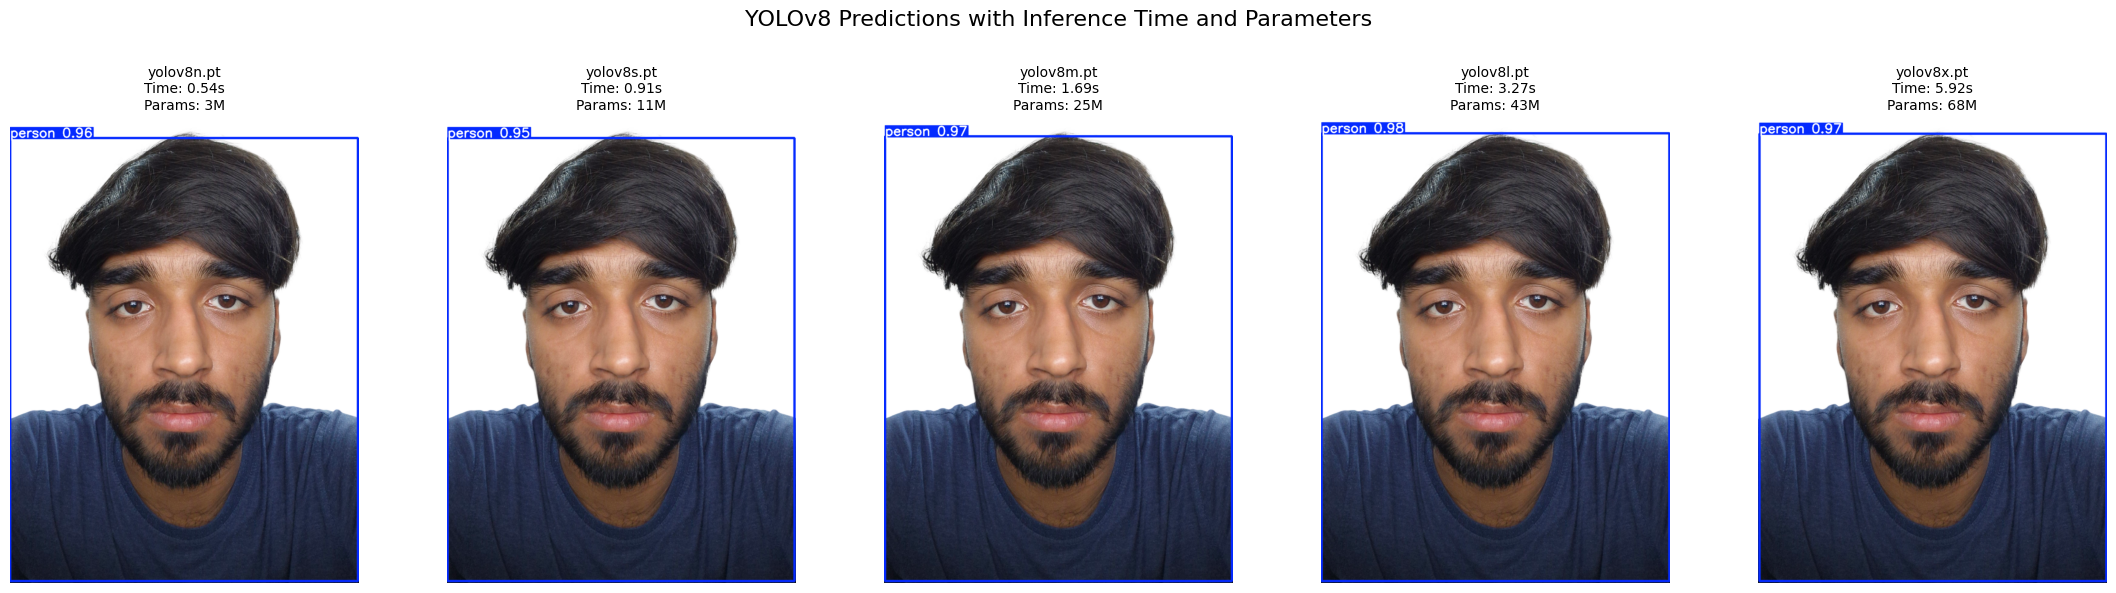

In [4]:
import time
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# List of models to compare
models = ['yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt', 'yolov8x.pt']

# Path to your test image
image_path = 'test_image.png'  # Make sure this image is in your working directory
image = cv2.imread(image_path)
assert image is not None, "Image not found. Check the path!"

# Create subplot
fig, axes = plt.subplots(1, len(models), figsize=(22, 6))
fig.suptitle("YOLOv8 Predictions with Inference Time and Parameters", fontsize=16)

# Loop through models
for i, model_name in enumerate(models):
    print(f"\nRunning model: {model_name}")

    model = YOLO(model_name)

    # Measure inference time
    start_time = time.time()
    result = model(image_path)[0]
    end_time = time.time()
    inference_time = end_time - start_time

    # Count parameters
    num_params = sum(p.numel() for p in model.model.parameters())

    # Annotate image
    annotated_image = result.plot()

    # Convert BGR to RGB for Matplotlib
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # Plot image and results
    axes[i].imshow(annotated_image_rgb)
    axes[i].axis('off')
    axes[i].set_title(
        f"{model_name}\nTime: {inference_time:.2f}s\nParams: {num_params//1_000_000}M",
        fontsize=10
    )

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()
